# TOTAL

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import graphviz
from tensorflow.keras.optimizers import Adam
import math
import numpy as np

In [2]:
X_train = np.arange(0, 2, 0.01)

In [3]:
y_train = np.cos(2* np.pi * X_train)+0.2

In [4]:
X_test = np.arange(0, 2, 0.05)

In [5]:
y_test = np.sin(np.pi * X_test)

In [6]:
indices = np.random.permutation(len(X_train))
x_train_shuffled = X_train[indices]
y_train_shuffled = y_train[indices]

## A

In [7]:
model = Sequential([
    Input(shape=(1,)),
    Dense(2, activation='relu'),
    Dense(1)
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
lr= 0.01
model.compile(optimizer=Adam(learning_rate = lr),
              loss='mse',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 2.7650 - val_accuracy: 0.0250 - val_loss: 0.9891
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 2.0901 - val_accuracy: 0.0250 - val_loss: 0.6089
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 1.5610 - val_accuracy: 0.0250 - val_loss: 0.3914
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 1.0860 - val_accuracy: 0.0250 - val_loss: 0.2841
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.8194 - val_accuracy: 0.0250 - val_loss: 0.2412
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.7376 - val_accuracy: 0.0250 - val_loss: 0.2359
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.6998 - val_accuracy: 0.0250 - val_loss: 0.2486
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.6389 - val_accu

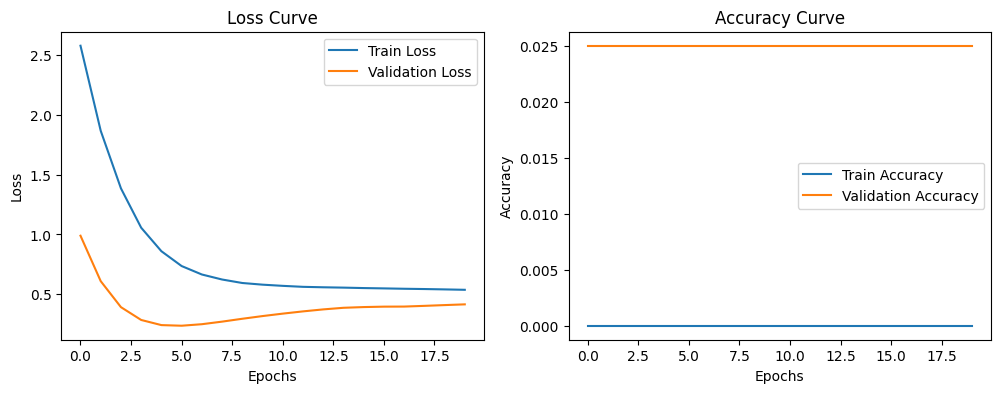

In [10]:
# Plot the learning curves
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## B

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4173 - val_loss: 0.3199
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2774 - val_loss: 0.2513
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2599 - val_loss: 0.2007
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1941 - val_loss: 0.1713
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1684 - val_loss: 0.1609
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1528 - val_loss: 0.1548
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1481 - val_loss: 0.1575
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1523 - val_loss: 0.1530
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1632 - val_loss: 0.1513
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1699 - val_loss: 0.1543
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1472 - val_loss: 0.1520
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1566 - val_loss: 0.1502
Epoch 1

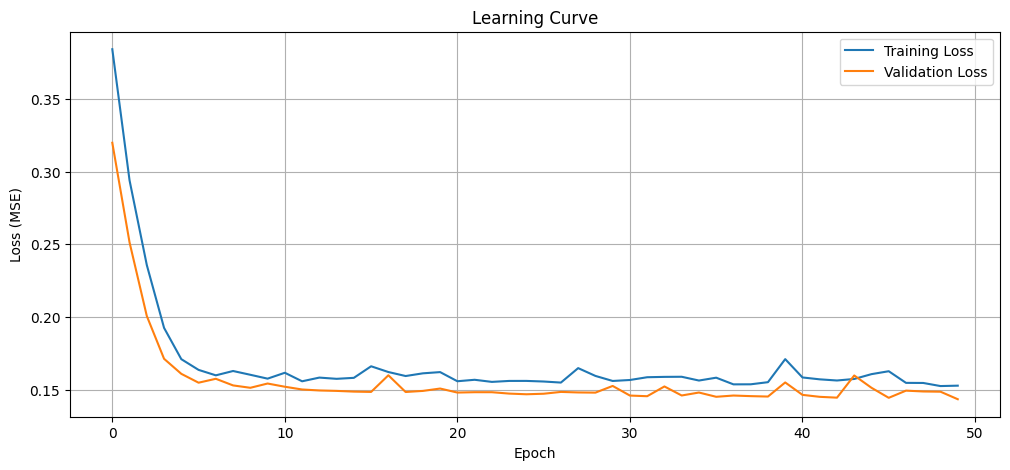

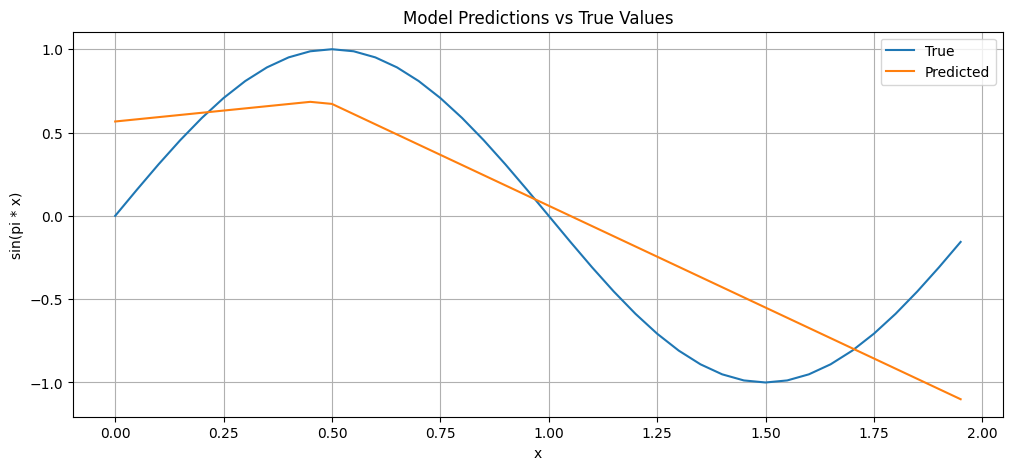

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

x_train = np.arange(0, 2, 0.01)
y_train = np.sin(np.pi * x_train)
x_test = np.arange(0, 2, 0.05)
y_test = np.sin(np.pi * x_test)

model = Sequential([
    Input(shape = (1,)),
    Dense(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

history = model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test))

test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

y_pred = model.predict(x_test)

plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x_test, y_test, label='True')
plt.plot(x_test, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(pi * x)')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.grid()
plt.show()


## C

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.4355 - val_loss: 0.3089
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2696 - val_loss: 0.1898
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1696 - val_loss: 0.1615
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2124 - val_loss: 0.1978
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2243 - val_loss: 0.1682
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1555 - val_loss: 0.1249
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1423 - val_loss: 0.1202
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1437 - val_loss: 0.1159
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1159 - val_loss: 0.1137
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1262 - val_loss: 0.1086
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137 - val_loss: 0.0990
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1157 - val_loss: 0.0904
Epoch 13/100

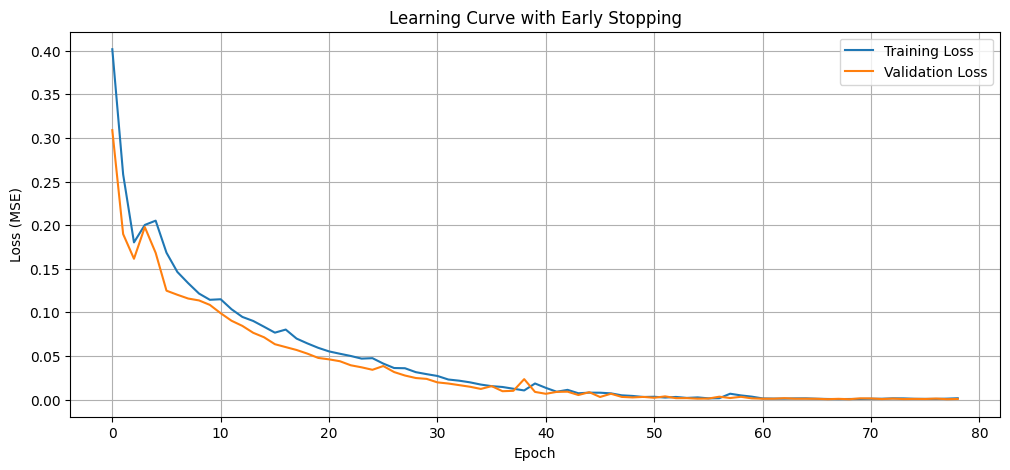

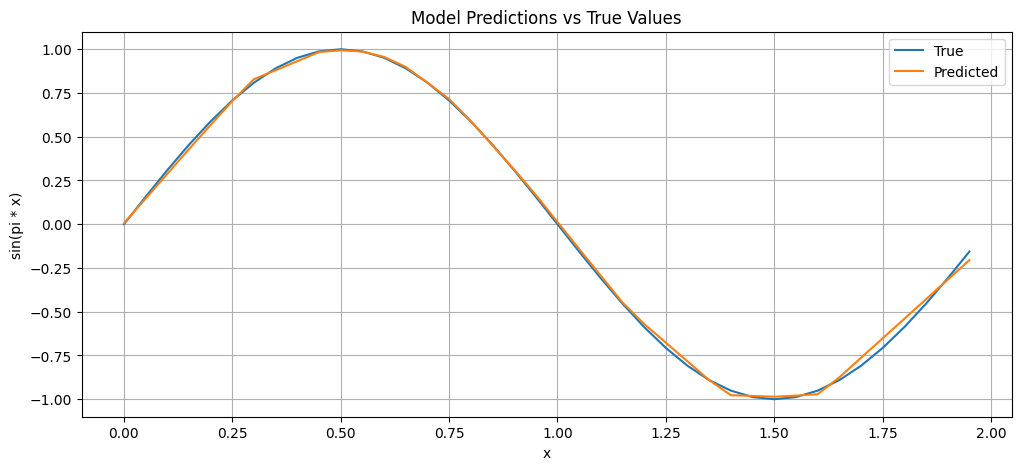

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

x_train = np.arange(0, 2, 0.01)
y_train = np.sin(np.pi * x_train)
x_test = np.arange(0, 2, 0.05)
y_test = np.sin(np.pi * x_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

y_pred = model.predict(x_test)

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve with Early Stopping')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x_test, y_test, label='True')
plt.plot(x_test, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(pi * x)')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.grid()
plt.show()


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4310 - val_loss: 0.1620
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1637 - val_loss: 0.1527
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1682 - val_loss: 0.1256
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1405 - val_loss: 0.1262
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1585 - val_loss: 0.1123
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1256 - val_loss: 0.1030
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1151 - val_loss: 0.0950
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1116 - val_loss: 0.0826
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1021 - val_loss: 0.0747
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0789 - val_loss: 0.0636
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - val_loss: 0.0543
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


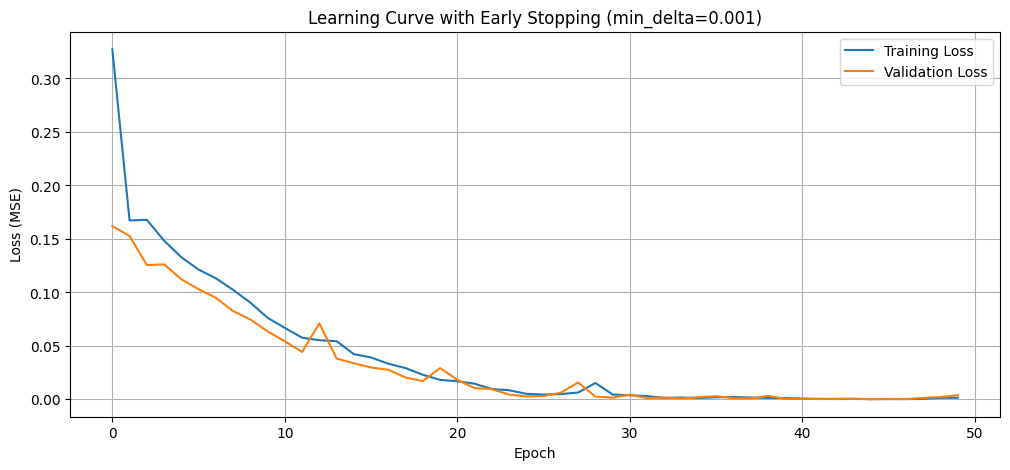

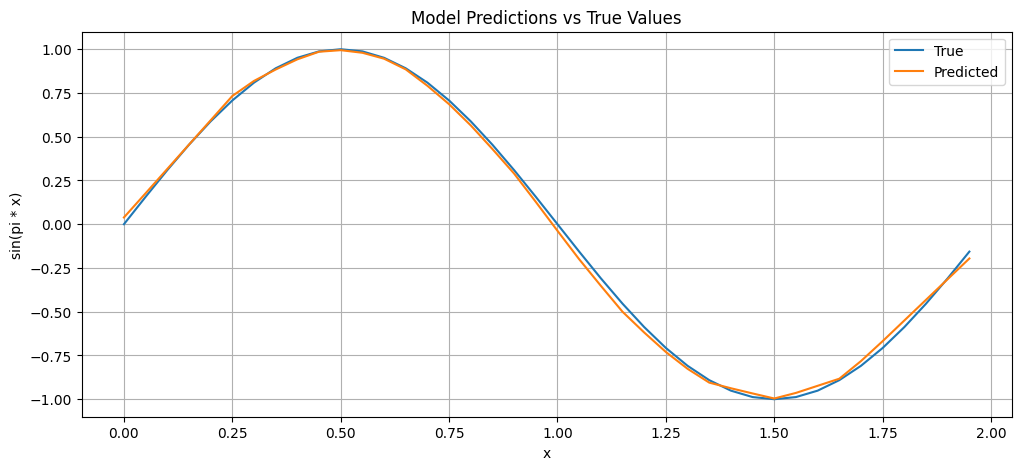

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

x_train = np.arange(0, 2, 0.01)
y_train = np.sin(np.pi * x_train)
x_test = np.arange(0, 2, 0.05)
y_test = np.sin(np.pi * x_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

y_pred = model.predict(x_test)

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve with Early Stopping (min_delta=0.001)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x_test, y_test, label='True')
plt.plot(x_test, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(pi * x)')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.grid()
plt.show()


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2831 - val_loss: 0.5486
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5696 - val_loss: 0.7236
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5453 - val_loss: 0.4471
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4444 - val_loss: 0.3860
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3831 - val_loss: 0.2958
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2569 - val_loss: 0.4265
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3394 - val_loss: 0.2412
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2143 - val_loss: 0.2124
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2004 - val_loss: 0.1974
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2345 - val_loss: 0.2685
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2438 - val_loss: 0.2081
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

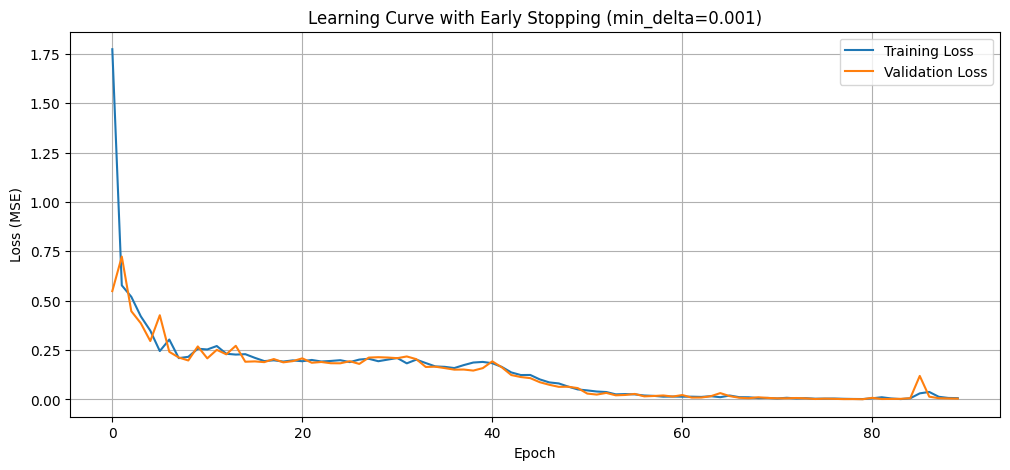

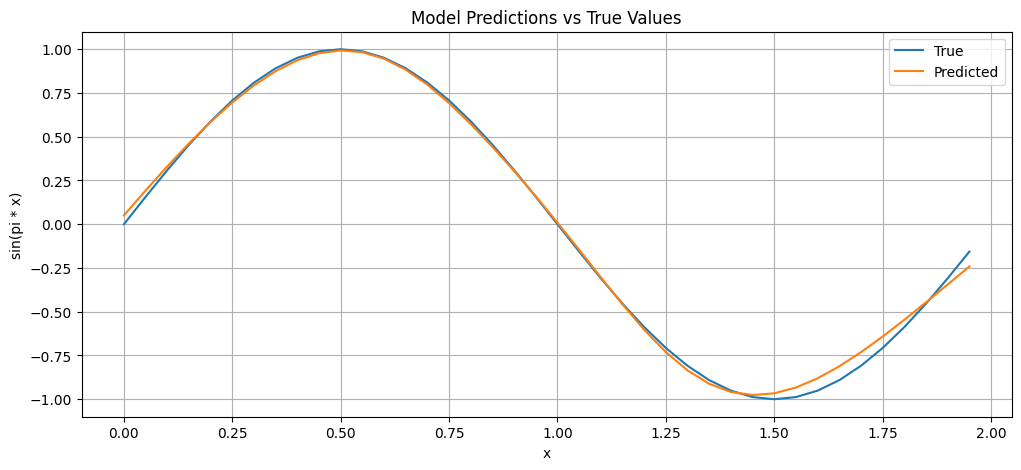

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

x_train = np.arange(0, 2, 0.01)
y_train = np.sin(np.pi * x_train)
x_test = np.arange(0, 2, 0.05)
y_test = np.sin(np.pi * x_test)

model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(1,)),  # لایه مخفی اول با تابع logsig
    Dense(32, activation='tanh'),                       # لایه مخفی دوم با تابع tansig
    Dense(16, activation='linear'),                       # لایه مخفی دوم با تابع tansig
    Dense(1)                                            # لایه خروجی
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

y_pred = model.predict(x_test)

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve with Early Stopping (min_delta=0.001)')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(x_test, y_test, label='True')
plt.plot(x_test, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(pi * x)')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.grid()
plt.show()


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9997 - val_loss: 0.5748
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5221 - val_loss: 0.4951
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4972 - val_loss: 0.4873
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4701 - val_loss: 0.4808
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4867 - val_loss: 0.4745
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4649 - val_loss: 0.4676
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4672 - val_loss: 0.4620
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4864 - val_loss: 0.4563
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4715 - val_loss: 0.4512
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4458 - val_loss: 0.4450
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4506 - val_loss: 0.4396
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

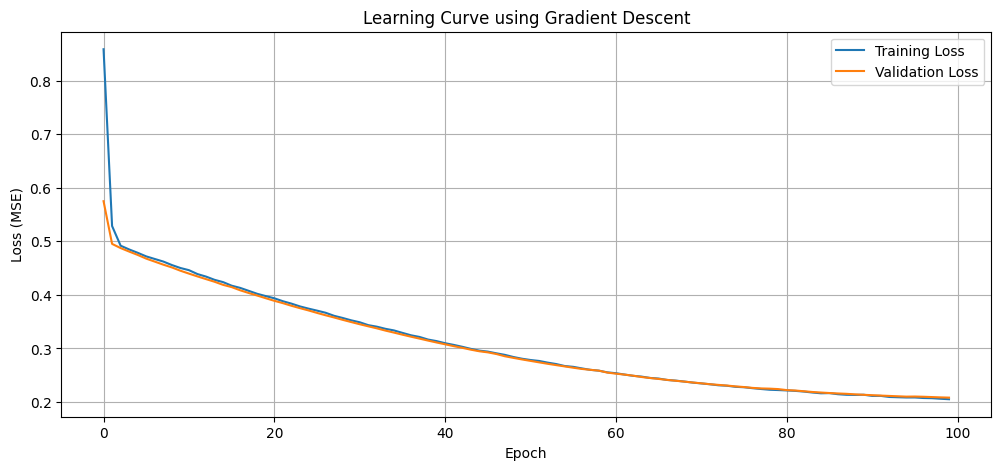

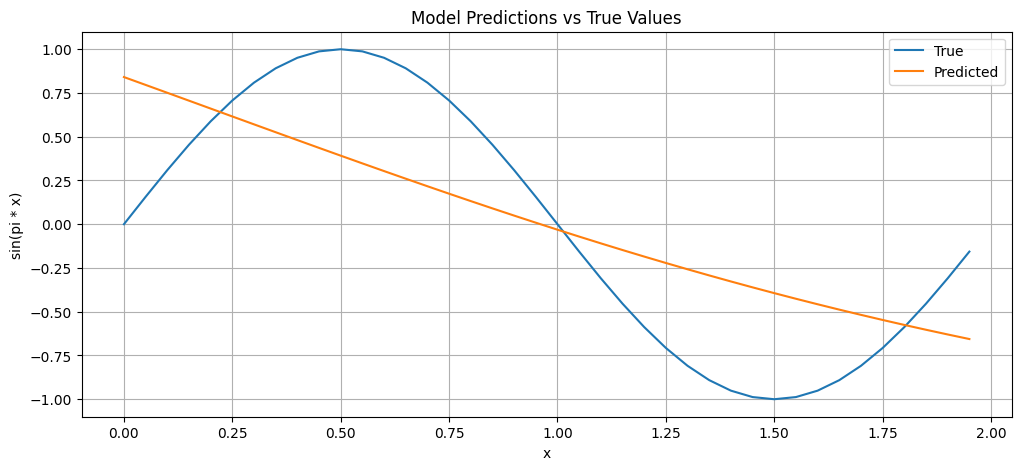

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

x_train = np.arange(0, 2, 0.01)
y_train = np.sin(np.pi * x_train)
x_test = np.arange(0, 2, 0.05)
y_test = np.sin(np.pi * x_test)

model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(1,)),  # لایه مخفی با 10 نورون و تابع logsig
    Dense(1, activation='linear')                       # لایه خروجی با تابع purelin
])

optimizer = SGD(learning_rate=0.01)  # تنظیم نرخ یادگیری برای SGD
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))

test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

y_pred = model.predict(x_test)

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve using Gradient Descent')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x_test, y_test, label='True')
plt.plot(x_test, y_pred, label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(pi * x)')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.grid()
plt.show()


In TensorFlow and Keras, you can implement equivalents of these learning functions (optimization algorithms) using different optimizers. Here’s how each of these algorithms would be represented:

1. **`traingd` - Gradient Descent**:
   - In Keras, you can use `SGD` (Stochastic Gradient Descent) with a momentum value of zero:
   ```python
   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
   ```

2. **`traingdm` - Gradient Descent with Momentum**:
   - Use `SGD` with a specified momentum value:
   ```python
   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
   ```

3. **`traingdx` - Gradient Descent with Momentum and Adaptive Learning Rate**:
   - The equivalent would be `SGD` with momentum and `nesterov=True`, along with a `learning_rate_schedule`. You can use `ExponentialDecay` or `ReduceLROnPlateau` to adjust the learning rate dynamically.
   ```python
   lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
       initial_learning_rate=0.01, decay_steps=100000, decay_rate=0.96, staircase=True)
   optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
   ```

4. **`traingda` - Gradient Descent with Adaptive Learning Rate**:
   - Use `SGD` with an adaptive learning rate by specifying `learning_rate_schedule`:
   ```python
   lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
       initial_learning_rate=0.01, decay_steps=100000, decay_rate=0.96, staircase=True)
   optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.0)
   ```

5. **`trainlm` - Levenberg-Marquardt**:
   - Unfortunately, TensorFlow and Keras do not provide a direct implementation of Levenberg-Marquardt, as this algorithm is tailored for non-linear least squares and is not directly used in general machine learning. For small networks, `Adam` or `RMSprop` can serve as a useful alternative.

6. **`trainbfg` - BFGS Quasi-Newton**:
   - BFGS is not implemented directly in TensorFlow, but for Newton-based methods in TensorFlow, `Adam` or `Adagrad` are good alternatives.
   ```python
   optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
   ```

7. **`traincgf` - Conjugate Gradient**:
   - Conjugate Gradient is also not directly available in Keras or TensorFlow, but `Adam` and `RMSprop` work well to achieve faster convergence in many machine learning problems.

### Example Implementation in TensorFlow

Here’s an example code for using SGD with momentum and an adaptive learning rate:

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model structure
model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(1,)),
    Dense(1, activation='linear')
])

# Use Gradient Descent with momentum and adaptive learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))
```

Each of these optimizers allows you to explore different characteristics, such as faster convergence or more stable learning, depending on the model's complexity and the data’s nature.